In [9]:
import os
import urllib.request
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import scipy.io
%matplotlib inline

In [2]:
df_test = pd.read_json('./data_raw/test.json')

In [3]:
df_test.shape

(12800, 1)

In [15]:
print(df_test.loc[0]["images"])

{'url': ['https://img13.360buyimg.com/imgzone/jfs/t13174/70/165792223/123424/f55c8e1e/5a225978N1fa68edc.jpg'], 'image_id': 1}


In [17]:
df_test.head(5)

,images,url,image_id
0,{'url': ['https://img13.360buyimg.com/imgzone/...,https://img13.360buyimg.com/imgzone/jfs/t13174...,1
1,{'url': ['http://img35.ddimg.cn/79/22/12581687...,http://img35.ddimg.cn/79/22/1258168705-1_u.jpg,2
2,{'url': ['https://img.alicdn.com/imgextra/TB19...,https://img.alicdn.com/imgextra/TB19HtjKXXXXXc...,3
3,{'url': ['https://img13.360buyimg.com/imgzone/...,https://img13.360buyimg.com/imgzone/jfs/t16498...,4
4,{'url': ['http://img4.99114.com/group1/M00/7D/...,http://img4.99114.com/group1/M00/7D/C5/wKgGTFf...,5


In [4]:
df_test['url']=df_test["images"].apply(lambda x: x["url"][0])

In [16]:
df_test['image_id']=df_test["images"].apply(lambda x: x["image_id"])

In [13]:
img_row = 128
img_cols = 128
resp = urllib.request.urlopen(str(df_test.loc[0]["url"]), timeout=5)
image = np.asarray(bytearray(resp.read()), dtype="uint8")
print(image.shape)
image = cv2.imdecode(image, cv2.IMREAD_COLOR)
image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
input_img = cv2.resize(image,(img_rows,img_cols))
input_img.shape

(123424,)


NameError: name 'img_rows' is not defined

In [25]:
img_rows = 128
img_cols = 128
for i in range(0,2):
    img_ids =[]
    img_data_list=[]
    for idx, row in df_test.loc[(1000*i):(1000*(i+1)-1)].iterrows():
        try:
            resp = urllib.request.urlopen(str(row["url"]), timeout=3)
            image = np.asarray(bytearray(resp.read()), dtype="uint8")
            image = cv2.imdecode(image, cv2.IMREAD_COLOR)
            print(str(idx)+' - ')
            #input_img = url_to_image(row["url"])
            image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
            input_img = cv2.resize(image,(img_rows,img_cols))
            img_data_list.append(input_img)
            #img_label.append(row["label_id"])
            img_ids.append(row["image_id"])
        except:
            print('fail:'+str(idx))
            pass
    img_data = np.array(img_data_list)    
    matfile = 'img_data_'+str(i)+'.mat'
    scipy.io.savemat(matfile, mdict={'out': img_data}, oned_as='row')
    
    img_ids = np.array(img_ids)    
    matfile = 'img_id_'+str(i)+'.mat'
    scipy.io.savemat(matfile, mdict={'out': img_ids}, oned_as='row')

0 - 
1 - 
2 - 
3 - 
4 - 
5 - 
6 - 
7 - 
8 - 
fail:9
10 - 
11 - 
12 - 
13 - 
14 - 
15 - 
16 - 
17 - 
18 - 
19 - 
20 - 
21 - 
22 - 
23 - 
24 - 
25 - 
26 - 
27 - 
28 - 
29 - 
30 - 
31 - 
32 - 
33 - 
34 - 
35 - 
36 - 
37 - 
38 - 
39 - 
40 - 
fail:41
42 - 
43 - 
44 - 
45 - 
46 - 
47 - 
48 - 
49 - 
50 - 
51 - 
52 - 
53 - 
54 - 
55 - 
56 - 
57 - 
fail:57
58 - 
fail:59
60 - 
61 - 
62 - 
63 - 
64 - 
65 - 
66 - 
67 - 
68 - 
69 - 
70 - 
71 - 
72 - 
73 - 
74 - 
75 - 
76 - 
77 - 
78 - 
79 - 
fail:79
80 - 
81 - 
82 - 
83 - 
84 - 
85 - 
86 - 
87 - 
88 - 
89 - 
90 - 
91 - 
92 - 
93 - 
fail:94
95 - 
96 - 
97 - 
98 - 
99 - 
100 - 
101 - 
102 - 
103 - 
104 - 
105 - 
106 - 
107 - 
108 - 
109 - 
110 - 
111 - 
112 - 
113 - 
114 - 
115 - 
116 - 
117 - 
118 - 
119 - 
120 - 
121 - 
122 - 
123 - 
124 - 
125 - 
126 - 
127 - 
fail:128
129 - 
130 - 
131 - 
132 - 
133 - 
134 - 
135 - 
136 - 
137 - 
138 - 
139 - 
140 - 
141 - 
142 - 
143 - 
144 - 
145 - 
146 - 
147 - 
148 - 
149 - 
150 - 
151 - 
fail:151
152 - 
153 

fail:1138
1139 - 
1140 - 
1141 - 
1142 - 
1143 - 
1144 - 
1145 - 
1146 - 
1147 - 
1148 - 
1149 - 
1150 - 
1151 - 
1152 - 
1153 - 
1154 - 
1155 - 
1156 - 
1157 - 
fail:1158
1159 - 
1160 - 
1161 - 
1162 - 
1163 - 
1164 - 
1165 - 
1166 - 
1167 - 
fail:1168
fail:1169
1170 - 
1171 - 
fail:1172
1173 - 
1174 - 
1175 - 
1176 - 
1177 - 
1178 - 
1179 - 
1180 - 
fail:1180
1181 - 
1182 - 
1183 - 
1184 - 
1185 - 
1186 - 
1187 - 
1188 - 
1189 - 
1190 - 
1191 - 
1192 - 
1193 - 
1194 - 
1195 - 
1196 - 
1197 - 
1198 - 
1199 - 
1200 - 
1201 - 
1202 - 
1203 - 
1204 - 
1205 - 
1206 - 
1207 - 
1208 - 
1209 - 
1210 - 
1211 - 
1212 - 
1213 - 
1214 - 
1215 - 
1216 - 
1217 - 
1218 - 
1219 - 
1220 - 
fail:1220
1221 - 
1222 - 
1223 - 
1224 - 
1225 - 
1226 - 
1227 - 
1228 - 
1229 - 
1230 - 
1231 - 
1232 - 
1233 - 
1234 - 
1235 - 
1236 - 
1237 - 
1238 - 
1239 - 
1240 - 
1241 - 
1242 - 
1243 - 
1244 - 
1245 - 
1246 - 
1247 - 
1248 - 
1249 - 
1250 - 
1251 - 
1252 - 
1253 - 
1254 - 
1255 - 
fail:1256
1257 - 
1258 - 


In [23]:
matfile = 'img_data_0.mat'
matdata = scipy.io.loadmat(matfile)
X_0 = matdata['out']
matdata['out'].shape

(9, 128, 128)

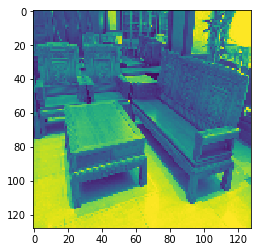

In [24]:
plt.imshow(X_0[2,:,:])